# Fandango.com Ratings Listing Inflation

The idea of this project is to study recent rating to determine if there is any change after the Hickey's Analysis of inflated ratings.


Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

The Goal of this project is to make sure, if any updates after the Fandango communication they fixed it.

Data - https://github.com/fivethirtyeight/data/tree/master/fandango




In [83]:
import pandas as pd
fandango_score = pd.read_csv("fandango_score_comparison.csv")
movie_ratings = pd.read_csv("movie_ratings_16_17.csv")

In [84]:
fandango_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [85]:
fandango_score.shape[0]

146

In [86]:
fandango_score['Fandango_votes'].head(5)

0    14846
1    12640
2    12055
3     1793
4     1021
Name: Fandango_votes, dtype: int64

In [87]:
fandango_score['Fandango_votes'].sample(5)

63     308
43      38
30      54
24    8381
59    1196
Name: Fandango_votes, dtype: int64

In [88]:
fandango_score.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
32,The Hunting Ground (2015),92,72,77,7.8,7.5,4.5,4.1,4.60,3.60,...,3.75,4.5,3.5,4.0,4.0,4.0,6,1196,42,0.4
98,Get Hard (2015),29,48,34,3.8,6.1,4.0,3.9,1.45,2.40,...,3.05,1.5,2.5,1.5,2.0,3.0,145,50022,5933,0.1
37,Welcome to Me (2015),71,47,67,6.9,5.9,4.0,3.6,3.55,2.35,...,2.95,3.5,2.5,3.5,3.5,3.0,33,8301,56,0.4
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,4.0,3.6,4.70,3.50,...,3.45,4.5,3.5,4.0,3.5,3.5,14,1151,281,0.4
33,The Boy Next Door (2015),10,35,30,5.5,4.6,4.0,3.6,0.50,1.75,...,2.30,0.5,2.0,1.5,3.0,2.5,75,19658,2800,0.4


In [89]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [90]:
cols_movie_rating = ['movie','year','fandango']
cols_fandango_score = ['FILM','Fandango_Stars',
                       'Fandango_Ratingvalue', 
                       'Fandango_votes', 
                       'Fandango_Difference']

In [91]:
fandango = fandango_score[cols_fandango_score]

In [92]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [93]:
movie = movie_ratings[cols_movie_rating]

In [94]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [95]:
movie.sample(5)

,movie,year,fandango
145,Skiptrace,2016,3.5
80,Inferno,2016,3.5
163,The Boss,2016,3.5
191,The Perfect Match,2016,4.0
114,Moana,2016,4.5


In [96]:
fandango.sample(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
21,Insidious: Chapter 3 (2015),4.5,4.1,3276,0.4
33,The Boy Next Door (2015),4.0,3.6,2800,0.4
112,It Follows (2015),3.0,2.9,2097,0.1
97,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
93,What We Do in the Shadows (2015),4.5,4.3,259,0.2
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
140,Inside Out (2015),4.5,4.5,15749,0.0
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
9,Love & Mercy (2015),4.5,4.0,864,0.5
106,Cake (2015),3.5,3.4,482,0.1


https://github.com/fivethirtyeight/data/blob/master/fandango/README.md

https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md

Population interest is fandango ratings. 
Our goal is to determine whether there has been any change in Fandango's rating system following Hickey's analysis. The population of interest for our analysis comprises all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to determine if the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — before and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken prior to the analysis, and the other was taken after the analysis. We want to describe the population, so we need to make sure that the samples are representative; otherwise, we should expect a large sampling error and, ultimately, inaccurate conclusions.

From Hickey's article and from the README.md of the data set's repository (https://github.com/fivethirtyeight/data/tree/master/fandango) , we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested in describing. It seems more likely that it isn't, mostly because this sample is subject to temporal trends (e.g., movies in 2015 might have been outstandingly good or bad compared to other years).

The sampling conditions for our other sample were the following (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (it's unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends, and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling) (https://youtu.be/CdK7N_kTzHI). While these samples were good enough for their research, they don't seem too useful for us.

In [97]:
fandango.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [98]:
movie.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [99]:
movies_2016 = movie[movie['year'] == 2016]


In [100]:
movies_2016.shape

(191, 3)

In [101]:
movies_2015.shape


(129, 6)

# Isolating the Samples We Need
    
    With this new research goal, we have two populations of interest:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to randomly sample 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [102]:
movie.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

In [103]:
fandango['year'] = fandango['FILM'].str[-5:-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
fandango['year'].head(5)

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object

In [105]:
movies_2015 = fandango[fandango['year'] == '2015'].copy()

In [106]:
movies_2015.shape

(129, 6)

In [107]:
fandango['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [108]:
sum(fandango['Fandango_votes'] < 30)

0

In [109]:
sum(fandango['year'] == '2015')

129

In [110]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
year                    146 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 6.9+ KB


In [111]:
movies_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [112]:
movies_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

In [115]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

In [117]:
movies_2016.sample(2)

,movie,year,fandango
213,Zootopia,2016,4.5
187,The Magnificent Seven,2016,4.5


In [118]:
movies_2015.sample(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
135,The Lazarus Effect (2015),3.0,3.0,1651,0.0,2015
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1,2015


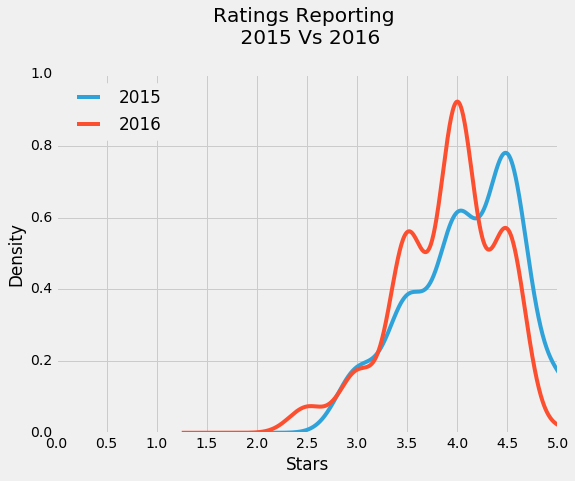

In [142]:
movies_2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(8,6))
movies_2016['fandango'].plot.kde(label='2016',legend=True)
plt.xlabel('Stars')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Ratings Reporting \n 2015 Vs 2016', y=1.07)
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))

plt.show()

Two aspects are interesting in the figure above:

Both distributions are strongly left-skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

# Comparing Relative Frequencies
It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the datasets have different numbers of movies, we normalize the tables and show percentages instead.


In [151]:
movies_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [153]:
movies_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings, and this challenges the direction of the change we saw on the kernel density plots.



# Determining the Direction of the Change

In [172]:
mean_2016 = movies_2016['fandango'].mean()
median_2016 = movies_2016['fandango'].median()
mode_2016 = movies_2016['fandango'].mode()[0]
# the output of Series.mode() is a bit uncommon

In [173]:
mean_2015 = movies_2015['Fandango_Stars'].mean()
median_2015 = movies_2015['Fandango_Stars'].median()
mode_2015 = movies_2015['Fandango_Stars'].mode()[0]
## the output of Series.mode() is a bit uncommon

In [174]:
summary = pd.DataFrame()

In [176]:
summary['2015'] = [mean_2015,median_2015,mode_2015]
summary['2016'] = [mean_2016,median_2016,mode_2016]
summary.index = ['mean','median','mode']

In [177]:
summary.head(3)

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


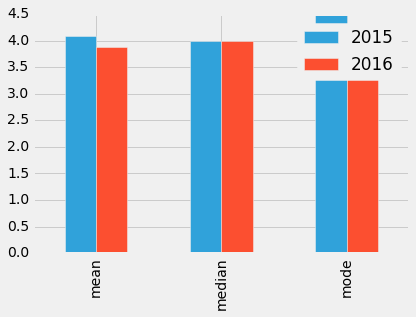

In [182]:
summary.plot.bar()

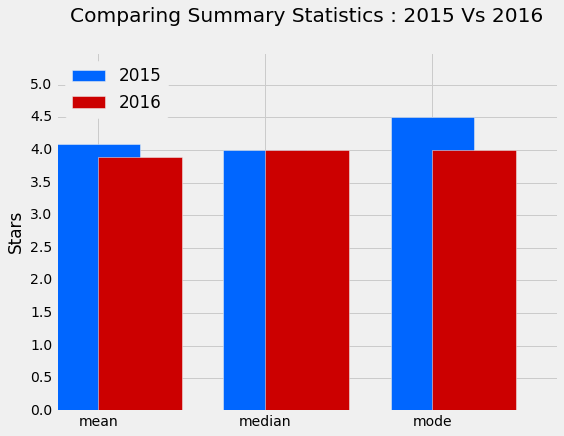

In [203]:
summary['2015'].plot.bar(label='2015',legend=True,
                         color = '#0066FF',align='center',width=0.5)
summary['2016'].plot.bar(label='2016',legend=True,
                        color = '#CC0000',align='edge',
                         width=0.5,figsize=(8,6),rot=0)
#plt.xlabel('Stars')


plt.title('Comparing Summary Statistics : 2015 Vs 2016',y=1.07)
plt.yticks(arange(0,5.5,.5))
plt.ylim(0,5.5)
plt.ylabel('Stars')

plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.
